# 3. ohe hot encoding, normalize
- 카테고리 변수는 one hot encoding
- 연속형 변수는 normalize

In [37]:
import pandas as pd
import seaborn as sns

In [67]:
# data = pd.read_csv('data/train_set/2.8_1unit_price_to_class', header = 0)
# data = pd.read_csv('temp2_imputation_after.csv', header =0, index_col =0 )
data = pd.read_csv('train_test_watching2.csv', header =0)
data = data.drop(columns =['Unnamed: 0.1.1','Unnamed: 0.1','Unnamed: 0','watching_level_rain_hour_max','watching_level_product_hour_max'])
data

,broadcast_time,product_category,unit_price,off_day,time,weekday,hour,temperature_seoul,rain_seoul,humid_seoul,...,season,day_dup,week_dup,working_time,buy_count,pastBuyer_count_mean,unit_price_class,type,diff,watching_level_rain_hour_max_Clusters_8
0,20.000000,의류,39900,True,06:00:00,1,6,-7.9,0.0,60.0,...,1,1.0,1.0,False,52.606516,384.962870,3.0,train,0.136653,6
1,20.000000,의류,39900,True,06:00:00,1,6,-7.9,0.0,60.0,...,1,1.0,1.0,False,109.548872,384.962870,3.0,train,0.284570,6
2,20.000000,의류,39900,True,06:20:00,1,6,-7.9,0.0,60.0,...,1,2.0,2.0,False,174.310777,109.548872,3.0,train,1.591169,6
3,20.000000,의류,39900,True,06:20:00,1,6,-7.9,0.0,60.0,...,1,2.0,2.0,False,81.754386,52.606516,3.0,train,1.554073,6
4,20.000000,의류,39900,True,06:40:00,1,6,-7.9,0.0,60.0,...,1,3.0,3.0,False,234.010025,141.929825,3.0,train,1.648773,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38086,10.000000,속옷,119000,False,00:10:00,2,0,18.8,0.0,85.0,...,3,6.0,6.0,False,NaN,364.460034,14.0,test,NaN,6
38087,10.000000,속옷,99000,False,00:10:00,2,0,18.8,0.0,85.0,...,3,6.0,6.0,False,NaN,364.460034,13.0,test,NaN,6
38088,10.000000,속옷,119000,False,00:10:00,2,0,18.8,0.0,85.0,...,3,6.0,6.0,False,NaN,364.460034,14.0,test,NaN,6
38089,20.000000,의류,69900,False,01:20:00,2,1,18.8,0.0,87.0,...,3,1.0,1.0,False,NaN,384.962870,10.0,test,NaN,6


In [70]:
data['pastBuyer_count_mean_org'] = data['pastBuyer_count_mean']

In [60]:
data.columns

Index(['broadcast_time', 'product_category', 'unit_price', 'off_day', 'time',
       'weekday', 'hour', 'temperature_seoul', 'rain_seoul', 'humid_seoul',
       'snow_seoul', 'temperature_busan', 'rain_busan', 'humid_busan',
       'snow_busan', 'pmWarning_seoul', 'pmWarning_busan', 'season', 'day_dup',
       'week_dup', 'working_time', 'buy_count', 'pastBuyer_count_mean',
       'unit_price_class', 'type', 'diff', 'watching_level_rain_hour_max',
       'watching_level_rain_hour_max_Clusters_8', 'pastBuyer_count_mean_org'],
      dtype='object')

## 1. 사용할 데이터만 가져오기

In [61]:
data.columns

Index(['broadcast_time', 'product_category', 'unit_price', 'off_day', 'time',
       'weekday', 'hour', 'temperature_seoul', 'rain_seoul', 'humid_seoul',
       'snow_seoul', 'temperature_busan', 'rain_busan', 'humid_busan',
       'snow_busan', 'pmWarning_seoul', 'pmWarning_busan', 'season', 'day_dup',
       'week_dup', 'working_time', 'buy_count', 'pastBuyer_count_mean',
       'unit_price_class', 'type', 'diff', 'watching_level_rain_hour_max',
       'watching_level_rain_hour_max_Clusters_8', 'pastBuyer_count_mean_org'],
      dtype='object')

In [71]:
data_use = data[['broadcast_time', 'product_category', 'unit_price', 'off_day',
       'weekday', 'hour', 'temperature_seoul', 'rain_seoul', 'humid_seoul',
       'snow_seoul', 'temperature_busan', 'rain_busan', 'humid_busan',
       'snow_busan', 'pmWarning_seoul', 'pmWarning_busan', 'season', 'day_dup',
       'week_dup', 'working_time', 'buy_count', 'watching_level_rain_hour_max_Clusters_8','pastBuyer_count_mean','pastBuyer_count_mean_org',
       'unit_price_class', 'type', 'diff']]
data_use_fit = data_use.copy()

## 2. 데이터의 종류
       
#### 정규화를 해야할 것 : 'broadcast_time', 'unit_price','rain_seoul', 'humid_seoul', 'snow_seoul', 'temperature_busan', 'rain_busan', 'humid_busan', 'snow_busan','hour','temperature_seoul','day_dup', 'week_dup','max_watching','avg_watching', 

#### 1 of c : 'product_category', 'weekday','season',

#### 그대로 사용 : 'off_day','pmWarning_seoul', 'pmWarning_busan', 'working_time', 

#### 정답데이터 :  'pastAvg_diff','handling_amount'

#### standard_scalar_list

In [72]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

scalar_list = [ 'broadcast_time', 'unit_price_class','rain_seoul',
                        'humid_seoul', 'snow_seoul', 'temperature_busan',
                        'rain_busan', 'humid_busan', 'snow_busan','hour',
                        'temperature_seoul','day_dup', 'week_dup','pastBuyer_count_mean']

data_use_fit.loc[:,scalar_list] = StandardScaler.fit_transform(pd.DataFrame(data_use.loc[:,scalar_list]))
data_use_fit.loc[1]

broadcast_time                              -0.100297
product_category                                   의류
unit_price                                      39900
off_day                                          True
weekday                                             1
hour                                         -1.24023
temperature_seoul                            -2.17925
rain_seoul                                  -0.128389
humid_seoul                                  0.218498
snow_seoul                                 -0.0616387
temperature_busan                            -2.37991
rain_busan                                   -0.15745
humid_busan                                 -0.901586
snow_busan                                -0.00887496
pmWarning_seoul                                 False
pmWarning_busan                                 False
season                                              1
day_dup                                     -0.992704
week_dup                    

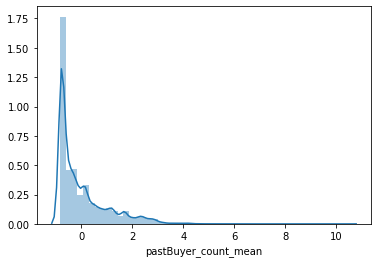

In [64]:
sns.distplot(data_use_fit['pastBuyer_count_mean'])

## 더미코딩

In [74]:
# 변수 type변환
data_use_fit['product_category'] = list(map(str,data_use_fit['product_category']))
data_use_fit['weekday'] = list(map(str,data_use_fit['weekday']))
data_use_fit['season'] = list(map(str,data_use_fit['season']))
data_use_fit['watching_level'] = list(map(str,data_use_fit['watching_level_rain_hour_max_Clusters_8']))
data_use_fit = pd.get_dummies(data_use_fit, drop_first=True, columns = ['product_category', 'weekday','season','watching_level_rain_hour_max_Clusters_8'])

data_use_fit.columns

Index(['broadcast_time', 'unit_price', 'off_day', 'hour', 'temperature_seoul',
       'rain_seoul', 'humid_seoul', 'snow_seoul', 'temperature_busan',
       'rain_busan', 'humid_busan', 'snow_busan', 'pmWarning_seoul',
       'pmWarning_busan', 'day_dup', 'week_dup', 'working_time', 'buy_count',
       'pastBuyer_count_mean', 'pastBuyer_count_mean_org', 'unit_price_class',
       'type', 'diff', 'watching_level', 'product_category_가전',
       'product_category_건강기능', 'product_category_농수축',
       'product_category_생활용품', 'product_category_속옷', 'product_category_의류',
       'product_category_이미용', 'product_category_잡화', 'product_category_주방',
       'product_category_침구', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'season_2', 'season_3',
       'season_4', 'watching_level_rain_hour_max_Clusters_8_1',
       'watching_level_rain_hour_max_Clusters_8_3',
       'watching_level_rain_hour_max_Clusters_8_5',
       'watching_level_rain_hour_max_Clust

In [75]:
data_use_fit.to_csv('data/train_set/3.data_normalize2.csv', index = False)